<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/ESAA_OB_%ED%95%84%EC%82%AC_%EC%9B%94%EA%B0%84_%EB%8D%B0%EC%9D%B4%EC%BD%98_%EC%86%8C%EC%84%A4_%EC%9E%91%EA%B0%80_%EB%B6%84%EB%A5%98_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **월간 데이콘 소설 작가 분류 AI 경진대회**
---

## **1. Facebook의 fasttext를 이용한 text classification**

In [1]:
%pip install fasttext
import fasttext

import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/235670_소설 작가 분류 AI 경진대회_data/train.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
file = open('fasttexttrain.txt','w+')
for i in train.index:
    line = '__label__' + str(train['author'][i])+' '+train['text'][i]
    file.write(line+"\n")

In [ ]:
text_clf_model = fasttext.train_supervised('fasttexttrain.txt', epoch=30, minCount=2, maxn=10, verbose=0)
print(text_clf_model.words)
print(text_clf_model.labels)

In [ ]:
reuslt = text_clf_model.predict("He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.", k=5)
print(reuslt)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/235670_소설 작가 분류 AI 경진대회_data/test_x.csv')
submission = pd.read_csv('/content/drive/MyDrive/235670_소설 작가 분류 AI 경진대회_data/sample_submission.csv', index_col=False)

In [ ]:
for i in test.index:
    lable, proba = text_clf_model.predict(test['text'][i], k=5)
    for la, pr in zip(lable, proba):
        if '__label__0' == la:
            submission.loc[i, '0'] = pr
        elif '__label__1' == la:
            submission.loc[i, '1'] = pr
        elif '__label__2' == la:
            submission.loc[i, '2'] = pr
        elif '__label__3' == la:
            submission.loc[i, '3'] = pr
        elif '__label__4' == la:
            submission.loc[i, '4'] = pr
    # submission.loc[i, '0'] = proba[lable.loc('__label__0')]
    # submission.loc[i, '1'] = proba[4]
    # submission.loc[i, '2'] = proba[2]
    # submission.loc[i, '3'] = proba[0]
    # submission.loc[i, '4'] = proba[3]

submission.to_csv('result5_fasttext.csv', index=False)
print('end')

## **2. NLP 전처리**

>**NLP Preprocessing이란?**
1. 신문기사들을 눈으로 확인하며 특수문자, 불용어, 문장 구조에 대한 감 잡기
2. 문제의 목적과 분석자의 재량에 따라 불용어를 설정한 후 리스트에 저장
3. 불용어 이외의 특수 문자들 제거.(한글과 영어 소문자를 제외한 모든 글자들 제거)
4. 형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리. 이때 내가 설정한 불용어들을 결과로 반환해주는 형태소 분석기 사용.
5. 형태소 단위의 토큰들을 기반으로 리스트에 저장된 불용어 제거.

### **1) 형태소 분석(Stemming)**

>* 형태소 분석이란 단어나 문장의 언어적 속성을 파악하는 것을 의미함. 품사의 태깅(PoS)을 통해 보통 이루어지며 한국어 형태소 분석은 Konlpy 패키지에 있는 다양한 함수를 이용하여 진행 가능
* 형태소 분석을 하는 이유는 형태소 단위로 의미있는 단어를 가져가고 싶거나, 품사 태깅을 통해 형용사나 명사를 추출하고 싶을 때 사용

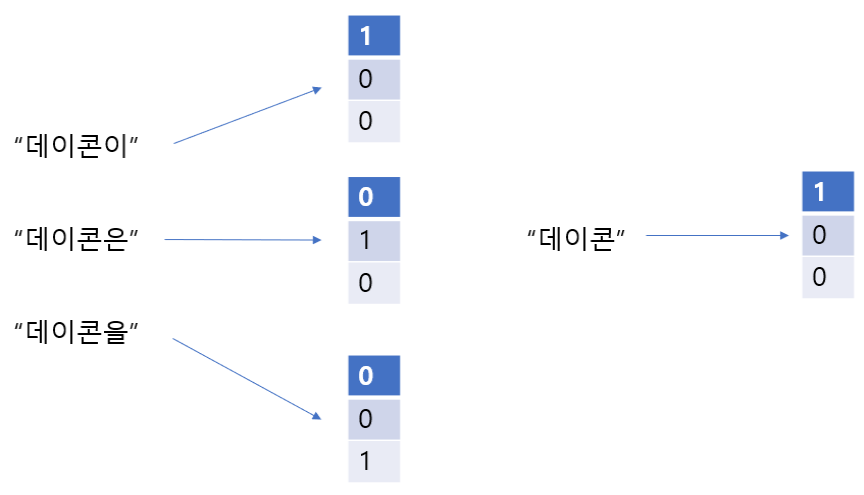

>* 문장을 띄어쓰기 단위로 분류하여 vectorization을 하게 되면 "데이콘"이라는 같은 의미의 토큰 세 개가 서로 다른 vector를 갖게 됨. 이럴 경우 모델이 세 단어를 각각 다른 단어로 이해하지만, 형태소 분석을 통해 "데이콘"이라는 토큰을 추출한다면 앞의 세 단어는 동일한 vector를 갖게되며 모델이 해당 토큰을 더 잘 학습하는 데 도움이 됨.
* 형태소 분석은 어쩌면 <u>모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정</u>임.

**1-1.Kkma()**

In [ ]:
%pip install konlpy

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(kkma.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(kkma.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

**1-2. Okt()**

In [ ]:
from konlpy.tag import Okt
Okt = Okt()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Okt.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Okt.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Okt.pos(sentence))

**1-3. Mecab()**

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
from konlpy.tag import Mecab 
Mecab  = Mecab()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Mecab .morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Mecab .nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Mecab .pos(sentence))

>이 외에도 다양한 형태소 분석기(Pos Tagger)들 존재함. 주로 Mecab 분석기 이용

### **2) 표제어 추출(Lemmatization)**

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '성장했었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

In [ ]:
sentence = '성장하였었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

### **3) 불용어 제거(Stopwords removing)**

>* 불용어: 문장에서 큰 의미가 없다고 생각되는 단어,글자

In [ ]:
import re
tokenizer = Okt()
def text_preprocessing(text,tokenizer):
    
    stopwords = ['을', '를', '이', '가', '은', '는']
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords]
        
    return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre= text_preprocessing(ex_text,tokenizer)

>1. 영어 소문자와 한글을 제외한 모든 문자 제거
2. Okt를 이용해 형태소 분석
3. 형태소 분석기를 거쳐 나온 결과들 중 stopwords 리스트에 포함되지 않는 토큰만 token이라는 리스트에 반환.

In [ ]:
#결과
print(example_pre)

###**4) 대회 적용**

In [ ]:
def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null'] #불용어 설정
    tokenizer = Okt() #형태소 분석기 
    token_list = []
    
    for text in text_list:
        txt = re.sub('[^가-힣a-z]', ' ', text) #한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt) #형태소 분석
        token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)
        
    return token_list, tokenizer

#형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문입니다. 
train['new_article'], okt = text_preprocessing(train['content']) 

## **3. Vectorization**

>**Vectorization이란?**
* NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것.

In [ ]:
from konlpy.tag import Okt
import re

Okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
    sentence = re.sub('[^가-힣a-z]', ' ', sentence) #간단한 전처리
    token = (Okt.morphs(sentence)) #형태소 분석기를 이용햔 토큰 나누기
    tokens.append(' '.join(token))

print("형태소 단위로 문장 분리")
print("----------------------")
print(tokens)

### **1) One Hot Encoding**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

t = Tokenizer()
t.fit_on_texts(tokens)
print("각 토큰에게 고유의 정수 부여")
print("----------------------")
print(t.word_index) 
print(" ")

s1=t.texts_to_sequences(tokens)[0] 
print("부여된 정수로 표시된 문장1")
print("----------------------")
print(s1)
print(" ")

s2=t.texts_to_sequences(tokens)[1]
print("부여된 정수로 표시된 문장2")
print("----------------------")
print(s2)
print(" ")

s1_one_hot = to_categorical(s1)
print("문장1의 one-hot-encoding")
print("----------------------")
print(s1_one_hot)
print(" ")

s2_one_hot = to_categorical(s2)
print("문장2의 one-hot-encoding")
print("----------------------")
print(s2_one_hot)

###**2) Count vectorization**

In [ ]:
# vocabulary 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens) #여러 개의 문장을 넣어줘야 작동합니다!!

print(vectorizer.get_feature_names())
print(vectors.toarray())

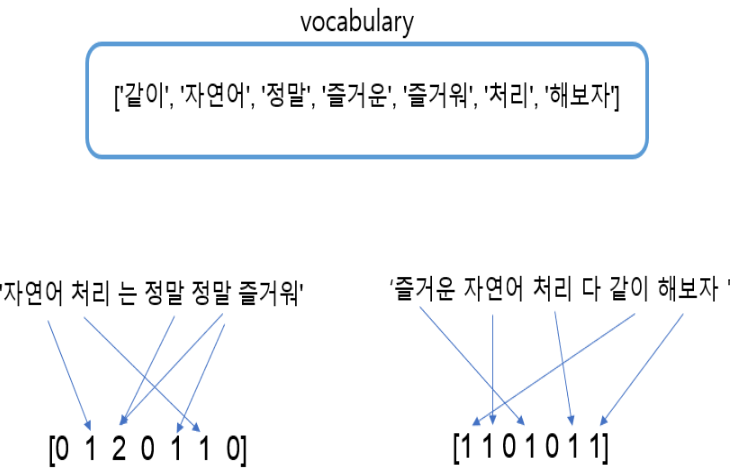

>* 벡터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시됨
* 형태소 분석기의 중요성 알 수 있음. 즐거운과 즐거워는 같은 의미를 가지는 토큰이지만 okt는 이를 구분하지 못해 다른 토큰으로 분리가 됨. 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미.

### **3) Tfldf**

>핵심
1. 단어가 몇번 등장했는지에 대한 정보
2. 어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는 데 있어서 중요한 단어<br/>
즉, 등장 횟수도 많고 문서 분별력 있는 단어들을 점수화하여 벡터화를 한 것이 Tfldf 기법.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens) 

#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())